In [2]:
import sqlite3
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

TITLE_DATASET = "../../data/title/title_dataset.db"
SONG_DATASET = "../../data/song/song_dataset.db"

conn = sqlite3.connect(TITLE_DATASET)

n_bins = 50


# Plotting Variation in Playlists for each Title

For a given title string, there may be *multiple playlists* with that title. 
Here we graph the distribution of *playlist* features for a given title.
Note that in all of these histograms, the samples are the audio features for a playlist, not its individual songs.

Plotting Wedding Dance Party
Plotting sad
Plotting rap
Plotting classical
Plotting dubstep


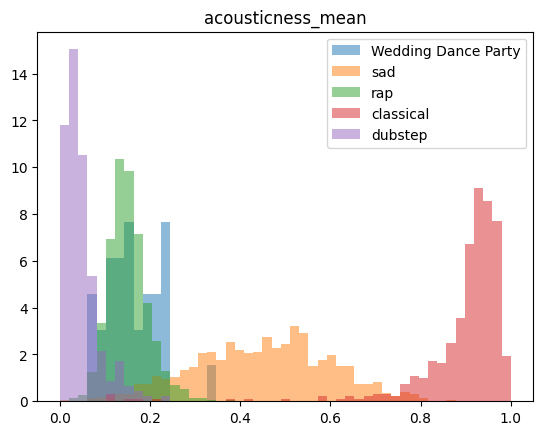

Plotting Wedding Dance Party
Plotting sad
Plotting rap
Plotting classical
Plotting dubstep


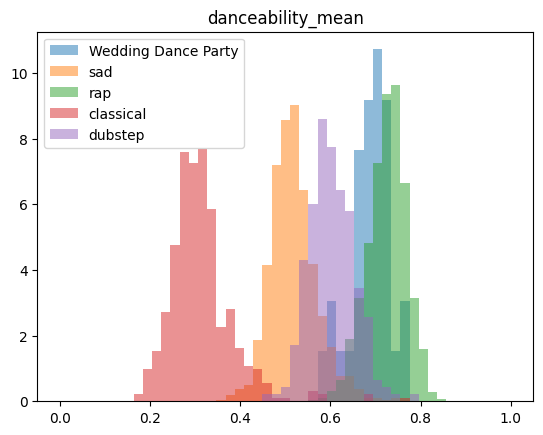

Plotting Wedding Dance Party
Plotting sad
Plotting rap
Plotting classical
Plotting dubstep


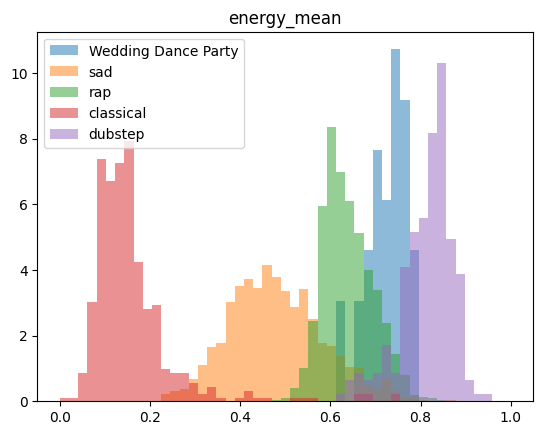

Plotting Wedding Dance Party
Plotting sad
Plotting rap
Plotting classical
Plotting dubstep


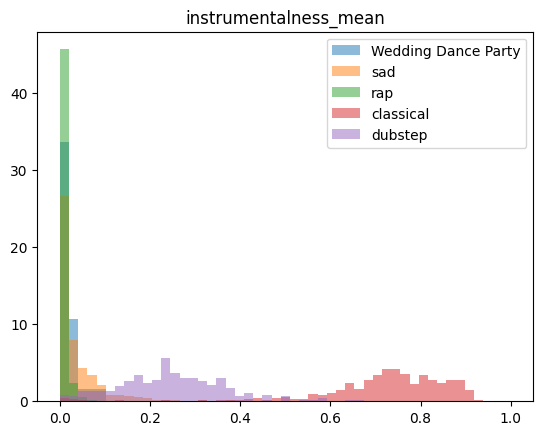

Plotting Wedding Dance Party
Plotting sad
Plotting rap
Plotting classical
Plotting dubstep


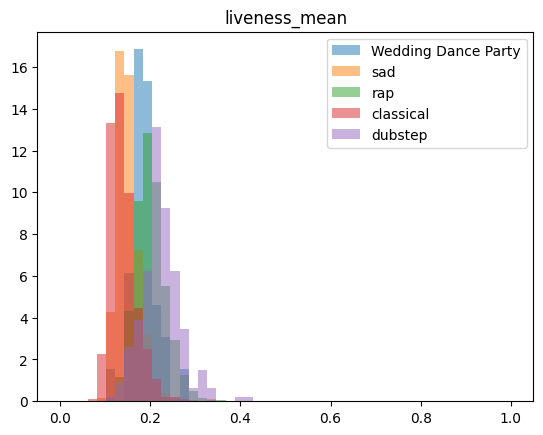

Plotting Wedding Dance Party
Plotting sad
Plotting rap
Plotting classical
Plotting dubstep


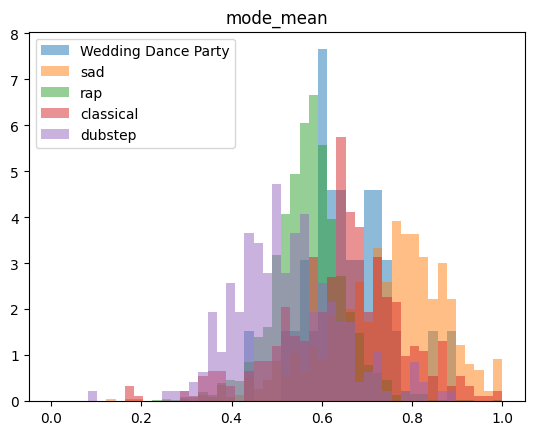

Plotting Wedding Dance Party
Plotting sad
Plotting rap
Plotting classical
Plotting dubstep


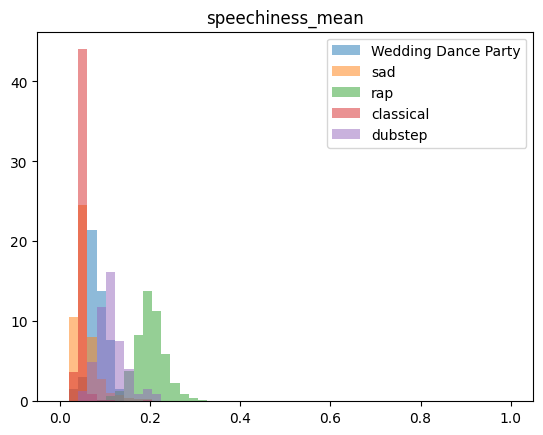

Plotting Wedding Dance Party
Plotting sad
Plotting rap
Plotting classical
Plotting dubstep


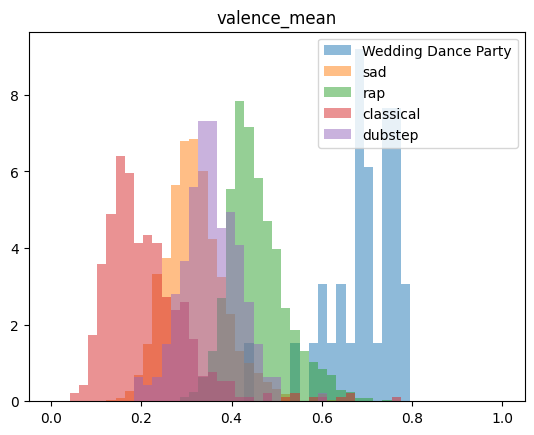

Plotting Wedding Dance Party
Plotting sad
Plotting rap
Plotting classical
Plotting dubstep


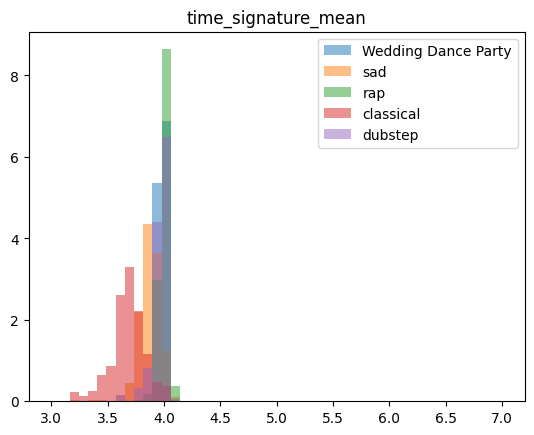

Plotting Wedding Dance Party
Plotting sad
Plotting rap
Plotting classical
Plotting dubstep


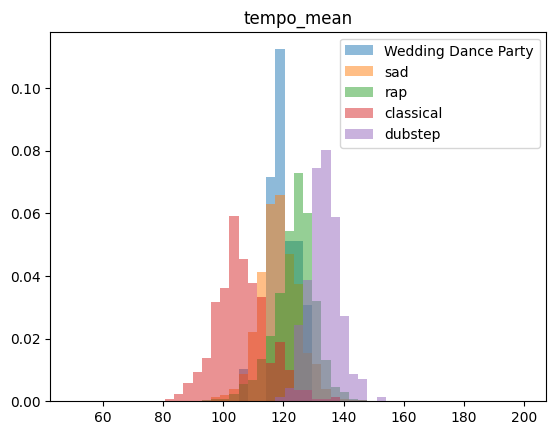

Plotting Wedding Dance Party
Plotting sad
Plotting rap
Plotting classical
Plotting dubstep


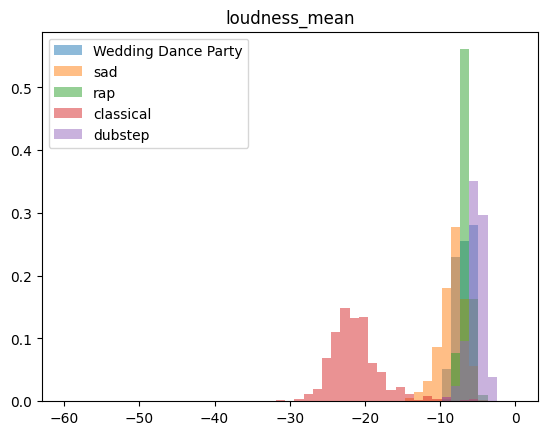

In [3]:

def plot_title_statistics(titles):
    """Plot box plot statistics for a given title. 
    Finds all playlists with the given title in the SQL title database and
    queries their aggregated mean audio features. Plots box-and-whisker plot
    to see how the playlists vary for that single title.
    """
    feature_ranges = {
        "acousticness_mean": [0,1],
        "danceability_mean": [0,1],
        "energy_mean": [0,1],
        "instrumentalness_mean": [0,1],
        "liveness_mean": [0,1],
        "mode_mean": [0,1],
        "speechiness_mean": [0,1],
        "valence_mean": [0,1],
        "time_signature_mean": [3,7],
        "tempo_mean": [50, 200],
        "loudness_mean": [-60, 0],
    }

    title_data = {}
    for title in titles:
        all_data = pd.read_sql("SELECT * FROM titles WHERE title=(?)", conn, params=[title])
        title_data[title] = all_data.filter(regex=".*_mean$", axis=1)
    
    for feature, (feature_low, feature_high) in feature_ranges.items():
        plt.figure()
        bins = np.linspace(feature_low, feature_high, n_bins)
        for title, data in title_data.items():
            print("Plotting " + title)
            plt.hist(data[feature], bins=bins, alpha=0.5, density=True, label=title)
        plt.legend()
        plt.title(feature)
        plt.show()


# plot_zero_one_statistics("Wedding Dance Party")
# plot_zero_one_statistics("sad")
# plot_zero_one_statistics("happy vibes")
# plot_zero_one_statistics("1984")
# plot_zero_one_statistics("gym time")

plot_title_statistics(["Wedding Dance Party", "sad", "rap", "classical", "dubstep"])

# Plotting song distribution within a playlist

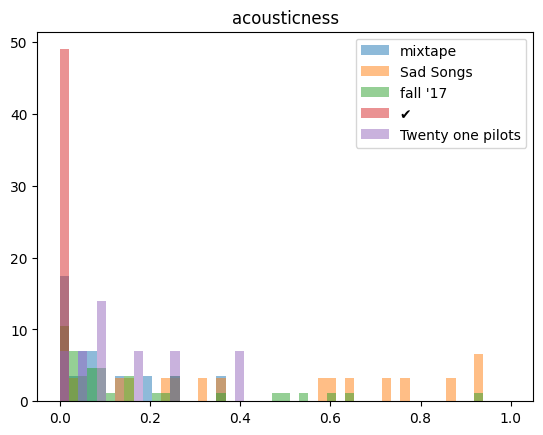

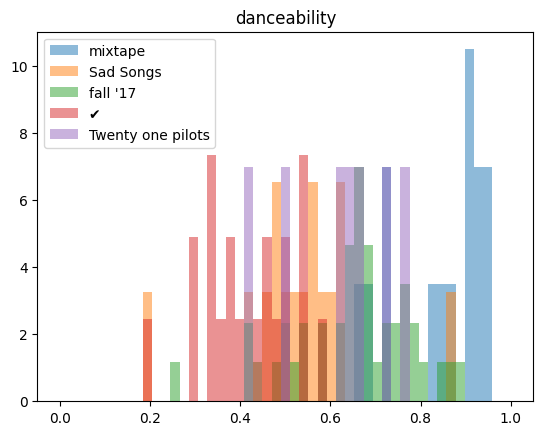

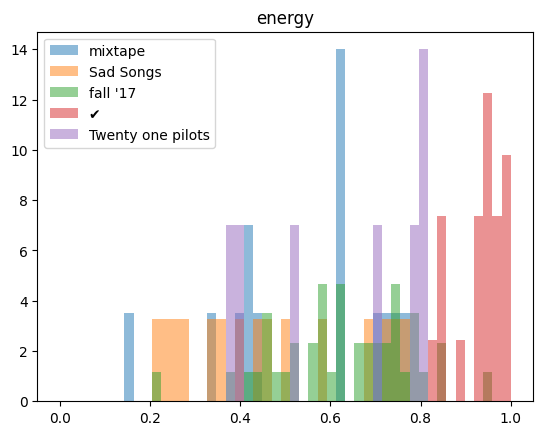

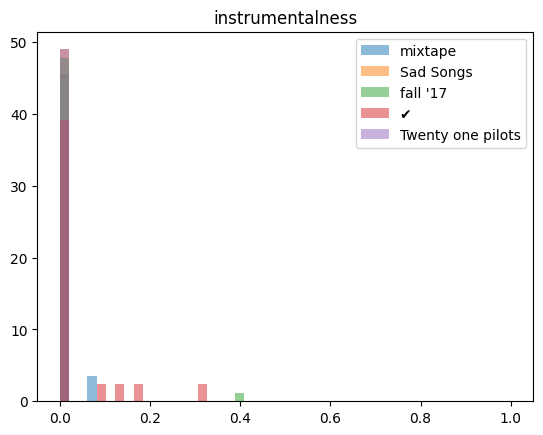

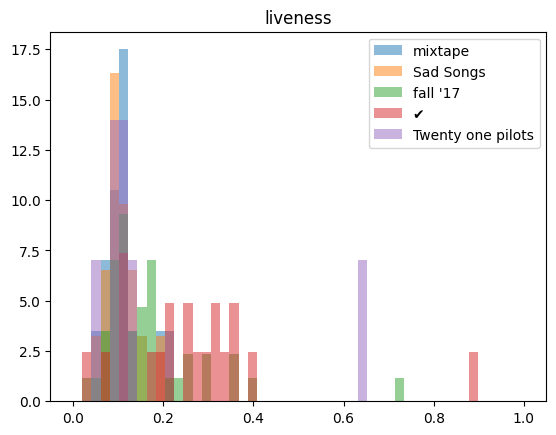

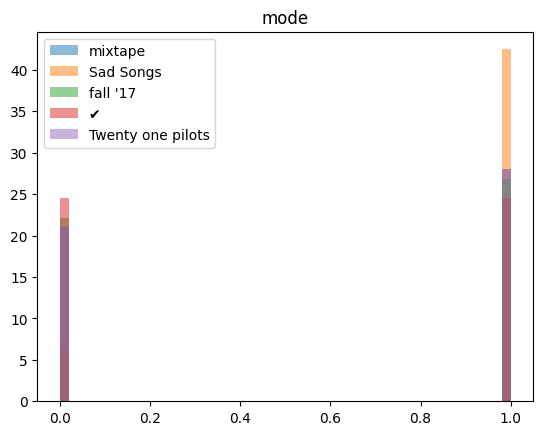

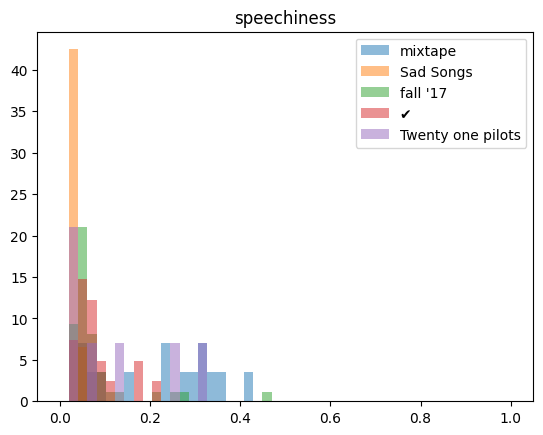

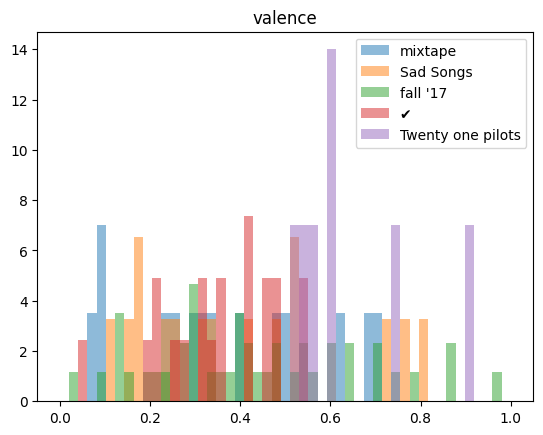

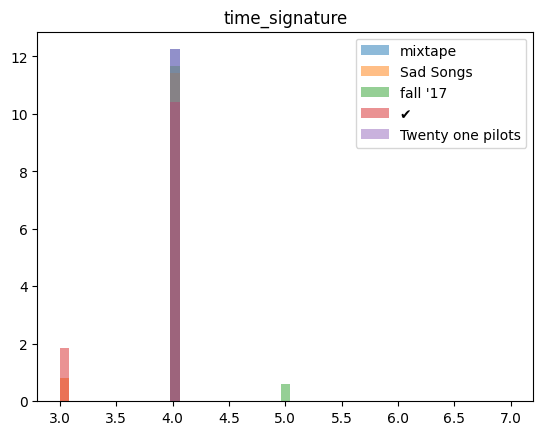

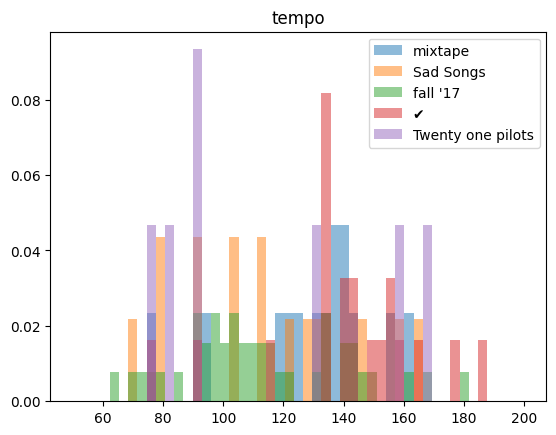

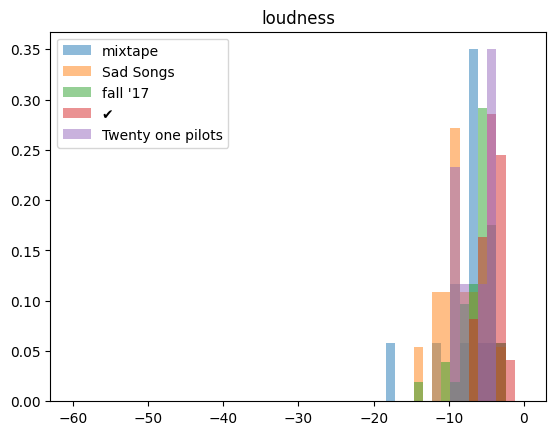

In [18]:
import json
import sys
sys.path.insert(0, '../../')
from common.utils import id_from_uri

song_conn = sqlite3.connect(SONG_DATASET)


n_bins_playlist = 50 
def plot_playlist_statistics(playlists):
    """Plot statistics for a given group of playlists.

    Params:
    - playlists: A list of tuples (songs, title) for each playlist, where:
        - songs: A list of song ID strings in that playlist
        - title: The title of that playlist.
    """
    feature_ranges = {
        "acousticness": [0,1],
        "danceability": [0,1],
        "energy": [0,1],
        "instrumentalness": [0,1],
        "liveness": [0,1],
        "mode": [0,1],
        "speechiness": [0,1],
        "valence": [0,1],
        "time_signature": [3,7],
        "tempo": [50, 200],
        "loudness": [-60, 0],
    }

    playlist_datas = [
        pd.read_sql(f"SELECT * FROM songs WHERE id IN ({','.join(['?']*len(songs))})", song_conn, params=songs)
        for songs, _ in playlists
    ]
    
    for feature, (feature_low, feature_high) in feature_ranges.items():
        plt.figure()
        bins = np.linspace(feature_low, feature_high, n_bins_playlist)
        for playlist_data, (_, title) in zip(playlist_datas, playlists):
            plt.hist(playlist_data[feature], bins=bins, alpha=0.5, density=True, label=title)
        plt.legend()
        plt.title(feature)
        plt.show()
    

def get_songs_title_from_playlist_slice(slice_json, index):
    """Get the list of songs (IDs) and the title of a playlist
    given the slice JSON its from and the playlist's index.
    """
    playlist_json = slice_json['playlists'][index]
    return [id_from_uri(track['track_uri']) for track in playlist_json['tracks']], \
           playlist_json['name']


with open('../../data/playlist/data/mpd.slice.0-999.json') as slice:
    slice_json = json.load(slice)

plot_playlist_statistics(
    [get_songs_title_from_playlist_slice(slice_json, i) for i in range(20, 25)]
)
